In [10]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [4]:
chocolate = pd.read_csv('/kaggle/input/chocolate-sales/Chocolate Sales.csv')
chocolate.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [7]:
chocolate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [8]:
chocolate.nunique()

Sales Person      25
Country            6
Product           22
Date             168
Amount           827
Boxes Shipped    385
dtype: int64

In [13]:
chocolate.dtypes

Sales Person     object
Country          object
Product          object
Date             object
Amount           object
Boxes Shipped     int64
dtype: object

In [16]:
chocolate['Amount'] = chocolate['Amount'].replace('[\$,]', '', regex=True).astype(float)

In [17]:
chocolate['Date'] = pd.to_datetime(chocolate['Date'])

In [18]:
chocolate.dtypes

Sales Person             object
Country                  object
Product                  object
Date             datetime64[ns]
Amount                  float64
Boxes Shipped             int64
dtype: object

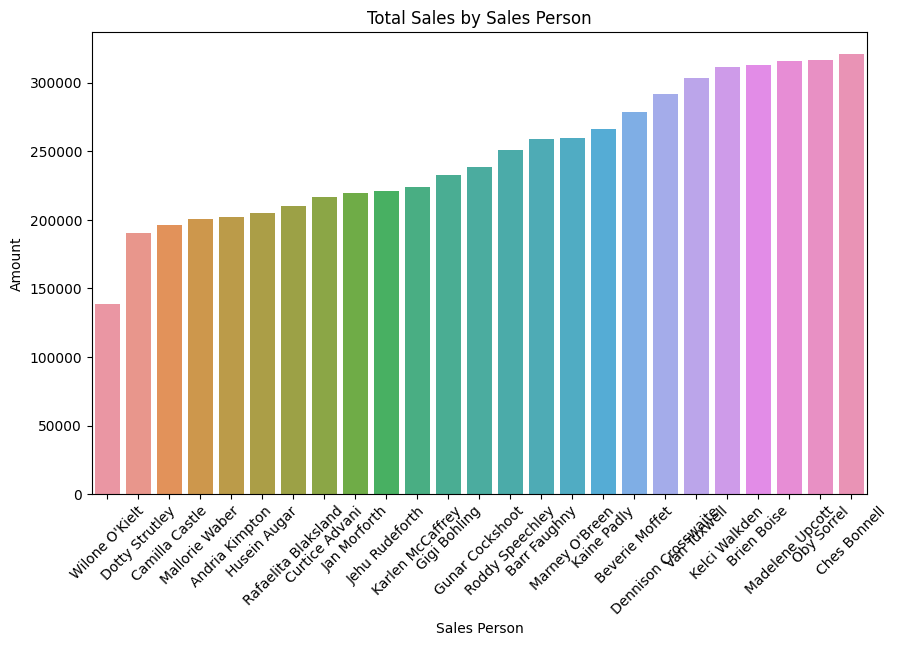

In [15]:
sales_by_person = chocolate.groupby('Sales Person')['Amount'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=sales_by_person, x='Sales Person', y='Amount', order=sales_by_person.sort_values('Amount')['Sales Person'])
plt.title('Total Sales by Sales Person')
plt.xticks(rotation=45)
plt.show()

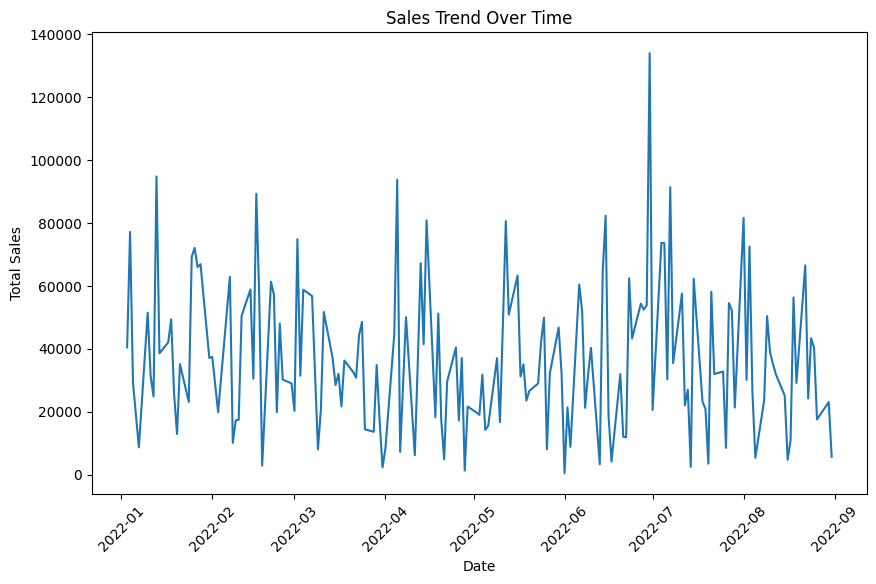

In [19]:
sales_by_date = chocolate.groupby('Date')['Amount'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=sales_by_date, x='Date', y='Amount')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

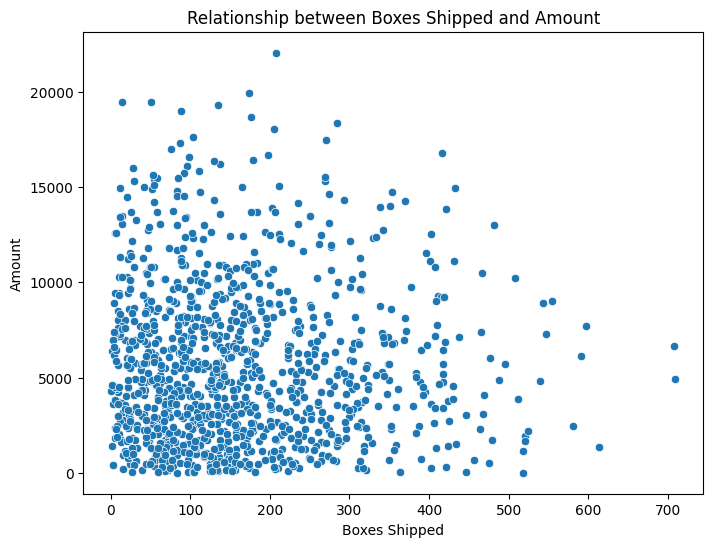

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=chocolate, x='Boxes Shipped', y='Amount')
plt.title('Relationship between Boxes Shipped and Amount')
plt.xlabel('Boxes Shipped')
plt.ylabel('Amount')
plt.show()

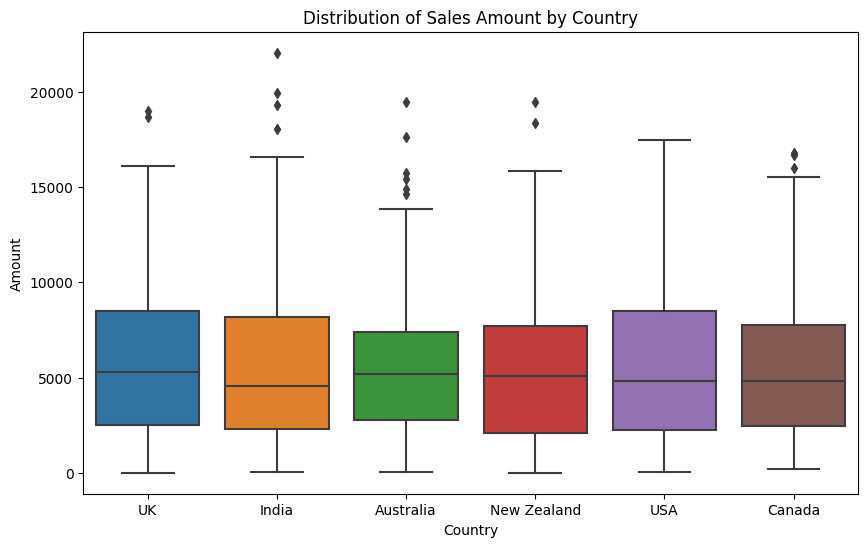

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(data=chocolate, x='Country', y='Amount')
plt.title('Distribution of Sales Amount by Country')
plt.xlabel('Country')
plt.ylabel('Amount')
plt.show()

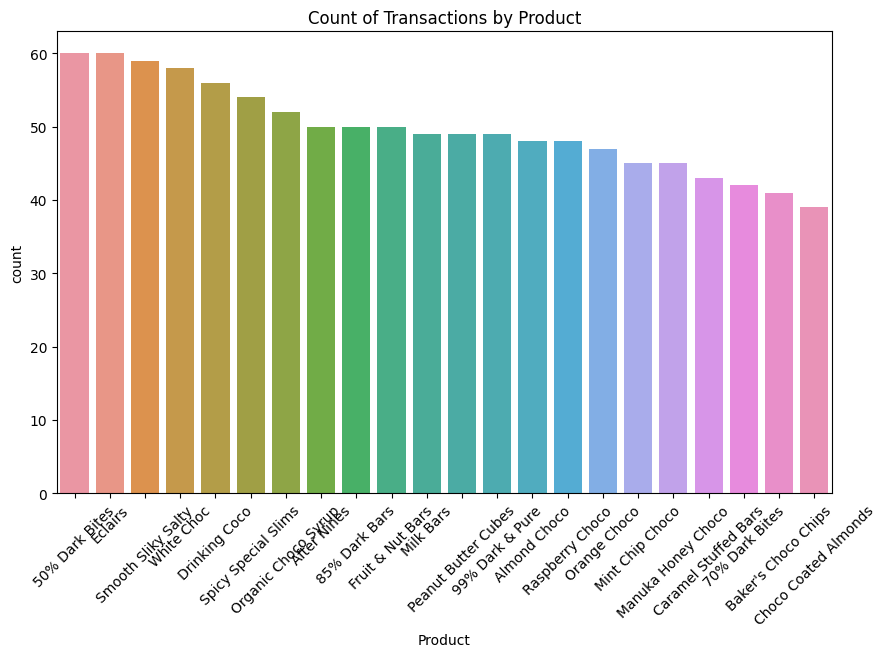

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(data=chocolate, x='Product', order=chocolate['Product'].value_counts().index)
plt.title('Count of Transactions by Product')
plt.xticks(rotation=45)
plt.show()

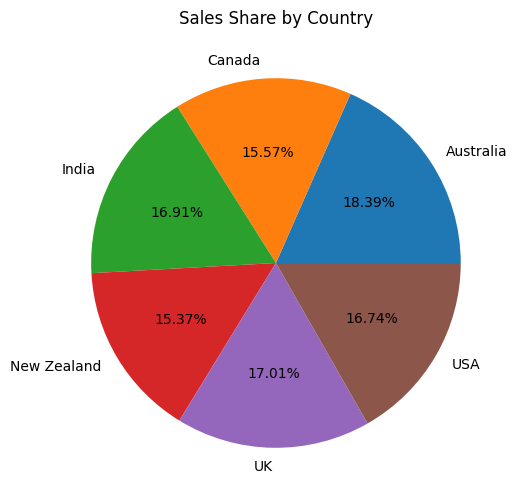

In [23]:
sales_by_country = chocolate.groupby('Country')['Amount'].sum()
plt.figure(figsize=(6,6))
plt.pie(sales_by_country, labels=sales_by_country.index, autopct='%.2f%%')
plt.title('Sales Share by Country')
plt.show()